Chapter 07

# 等距线
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用Matplotlib和Sympy库可视化了二维平面中每个点到原点$O(0, 0)$的距离分布。具体而言，代码定义了距离函数：

$$
f(x, y) = \sqrt{(x - x_O)^2 + (y - y_O)^2} = \sqrt{x^2 + y^2}
$$

这个函数表示平面上点$(x, y)$到原点的欧氏距离。代码首先生成了$x$和$y$的网格，将距离函数应用到网格上的每个点，以获得距离值矩阵。然后分别绘制三维网格图和二维等高线图。

1. **三维网格图**：在三维坐标系中展示距离函数，将$x$和$y$平面上的每个点到原点的距离映射到$z$轴，使得距离值对应高度。图形使用网格线展示函数变化，并以色彩图的形式增强视觉效果。距离从小到大的变化在$z$轴上形成以原点为中心的正圆锥形状。

2. **二维等高线图**：在二维平面上展示距离的等高线。等高线代表了到原点距离相同的点集，形成一系列同心圆。通过色彩渐变区分不同的距离，靠近原点的区域呈现暖色（红色），而远离原点的区域则呈现冷色（蓝色）。

最终图形直观地展示了二维平面中点到原点的距离分布，形成以原点为中心的同心圆结构，是对径向距离函数的可视化。

## 导入所需库

In [1]:
import numpy as np  # 导入numpy库，用于数值计算
from sympy import lambdify, sqrt  # 导入sympy的lambdify函数和sqrt函数
from sympy.abc import x, y  # 定义符号变量x和y
from matplotlib import pyplot as plt  # 导入matplotlib库用于绘图
from matplotlib import cm  # 导入cm用于色图

In [2]:
## 定义原点坐标
O = [0, 0]  # 原点坐标

## 创建网格

In [3]:
num = 301  # 网格数量
x_array = np.linspace(-8, 8, num)  # x轴坐标范围
y_array = np.linspace(-8, 8, num)  # y轴坐标范围

xx, yy = np.meshgrid(x_array, y_array)  # 生成二维网格

## 定义距离函数

In [4]:
dist_OP = sqrt((x - O[0])**2 + (y - O[1])**2)  # 定义点到原点的距离函数
dist_OP_fcn = lambdify([x, y], dist_OP)  # 将符号函数转换为数值函数
dist_OP_zz = dist_OP_fcn(xx, yy)  # 计算网格中每点到原点的距离

## 绘制三维网格图

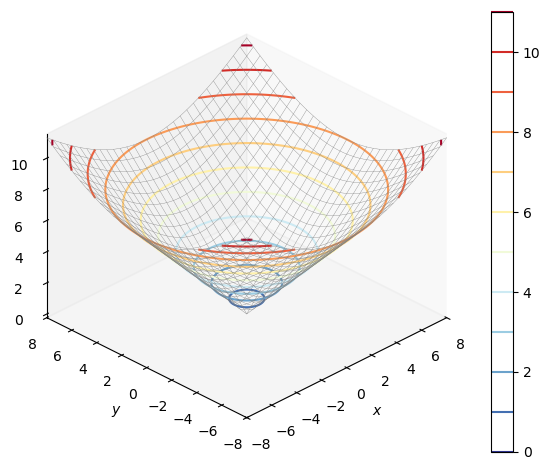

In [5]:
fig = plt.figure()  # 创建图形对象
ax = plt.axes(projection='3d')  # 创建三维坐标轴

ax.plot_wireframe(xx, yy, dist_OP_zz, color=[0.5, 0.5, 0.5], rstride=10, cstride=10, linewidth=0.25)  # 绘制距离的三维网格图

colorbar = ax.contour(xx, yy, dist_OP_zz, levels=np.arange(0, 12), cmap='RdYlBu_r')  # 添加等高线并设置色彩映射
fig.colorbar(colorbar, ax=ax)  # 添加色条

ax.set_proj_type('ortho')  # 设置投影类型为正交
ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
ax.set_zlabel('$f(x,y)$')  # 设置z轴标签
plt.tight_layout()  # 自动调整布局
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围

ax.view_init(azim=-135, elev=30)  # 设置视角
ax.grid(False)  # 关闭网格

## 绘制二维等高线图

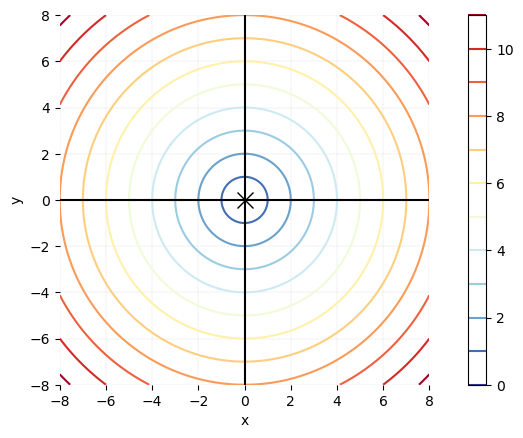

In [6]:
fig, ax = plt.subplots()  # 创建二维图形和坐标轴

plt.plot(O[0], O[1], color='k', marker='x', markersize=12)  # 在图中标记原点

colorbar = ax.contour(xx, yy, dist_OP_zz, levels=np.arange(0, 12), cmap='RdYlBu_r')  # 绘制等高线图
fig.colorbar(colorbar, ax=ax)  # 添加色条

plt.xlabel('x')  # 设置x轴标签
plt.ylabel('y')  # 设置y轴标签
plt.axhline(y=0, color='k', linestyle='-')  # 绘制y轴
plt.axvline(x=0, color='k', linestyle='-')  # 绘制x轴
plt.xticks(np.arange(-10, 10, step=2))  # 设置x轴刻度
plt.yticks(np.arange(-10, 10, step=2))  # 设置y轴刻度
plt.axis('scaled')  # 保持x和y轴比例一致

ax.set_xlim(x_array.min(), x_array.max())  # 设置x轴范围
ax.set_ylim(y_array.min(), y_array.max())  # 设置y轴范围
ax.spines['top'].set_visible(False)  # 隐藏顶部边框
ax.spines['right'].set_visible(False)  # 隐藏右侧边框
ax.spines['bottom'].set_visible(False)  # 隐藏底部边框
ax.spines['left'].set_visible(False)  # 隐藏左侧边框

ax.grid(linestyle='--', linewidth=0.25, color=[0.8, 0.8, 0.8])  # 添加虚线网格